# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm.

iris dataset- https://retail.ictkerala.org/pluginfile.php/149975/mod_assign/introattachment/0/iris.xls?forcedownload=1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1. Read the dataset to the python environment.**

In [2]:
df=pd.read_excel(r'H:\Soft\iris.xls')

In [3]:
df.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(5)

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2. Do necessary pre-processing steps.**

In [7]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

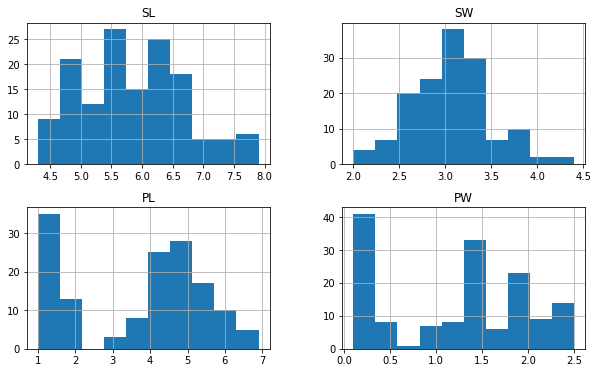

In [8]:
df1=df.select_dtypes(include=['float'])
df.hist(figsize=(10,6))
plt.show()

In [9]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
df['SL'] = df['SL'].fillna(df['SL'].median())

In [11]:
df['SW'] = df['SW'].fillna(df['SW'].median())

In [12]:
df['PL'] = df['PL'].fillna(df['PL'].median())

In [13]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
df.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


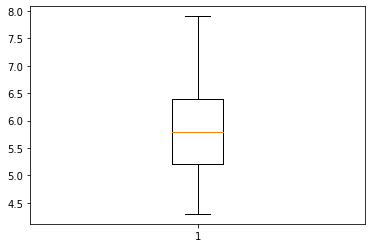

In [15]:
# Checking Outlayers 
plt.boxplot(df['SL'])
plt.show()

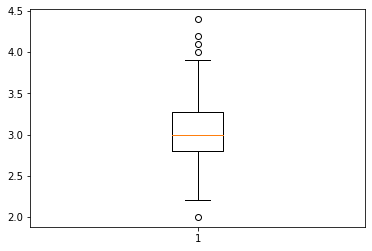

In [16]:
plt.boxplot(df['SW'])
plt.show() 

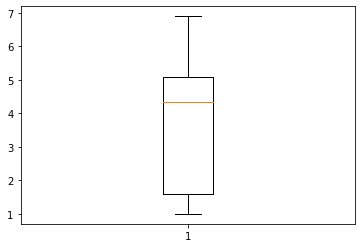

In [17]:
plt.boxplot(df['PL'])
plt.show()

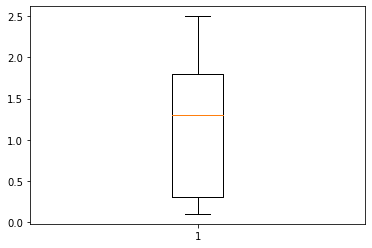

In [18]:
plt.boxplot(df['PW'])
plt.show()

In [19]:
# scatter plot
colors= ['red','blue','green']
Classification=['Iris-setosa','Iris-virginica','Iris-versicolor']

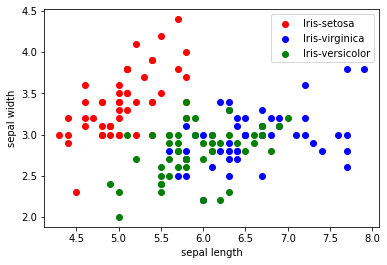

In [20]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['SL'],x['SW'],c= colors[i],label= Classification[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

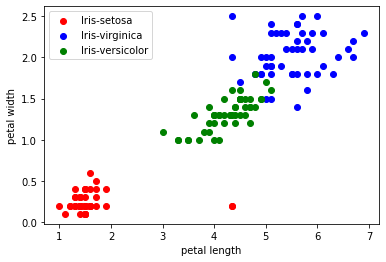

In [21]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['PL'],x['PW'],c= colors[i],label= Classification[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

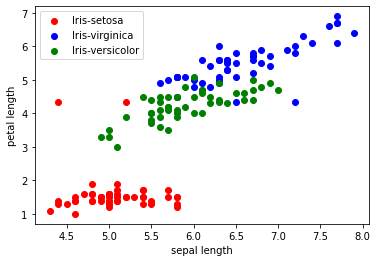

In [22]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['SL'],x['PL'],c= colors[i],label= Classification[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

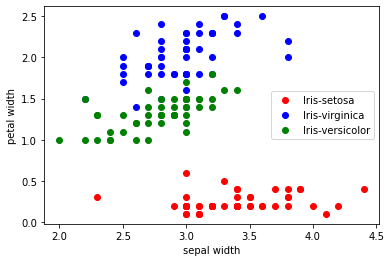

In [23]:
for i in range(3):
    x= df[df['Classification']== Classification[i]]
    plt.scatter(x['SW'],x['PW'],c= colors[i],label= Classification[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [24]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

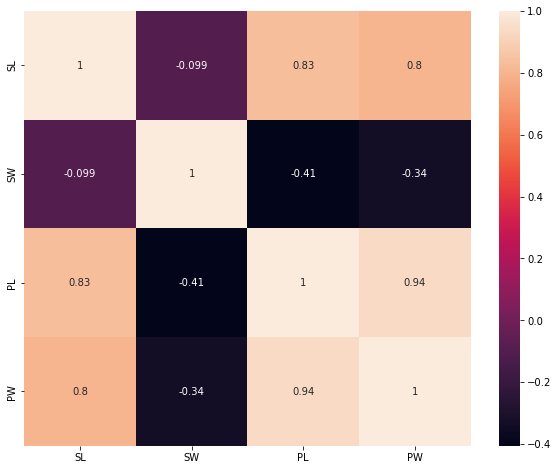

In [25]:
corr=df.corr()
fig,ax= plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot= True,ax=ax)

In [26]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [27]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [28]:
df['Classification']= label.fit_transform(df['Classification'])

In [29]:
df.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm.**

In [30]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Classification'])
Y=df['Classification']
x_train, x_test, y_train, y_test= train_test_split( X, Y, test_size= 0.30)

In [31]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
print('Training Accuracy:', model.score( x_train, y_train)*100)

Training Accuracy: 95.23809523809523


In [34]:
print('Accuracy:', model.score( x_test, y_test)*100)

Accuracy: 95.55555555555556


In [35]:
# K-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [36]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
print('Training Accuracy:', model.score( x_train, y_train)*100)

Training Accuracy: 97.14285714285714


In [38]:
print('Accuracy:', model.score( x_test, y_test)*100)

Accuracy: 95.55555555555556


In [39]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

In [40]:
model.fit(x_train, y_train)

SVC(gamma=0.1, random_state=0)

In [41]:
print('Training Accuracy:', model.score( x_train, y_train)*100)

Training Accuracy: 96.19047619047619


In [42]:
print('Accuracy:', model.score( x_test, y_test)*100)

Accuracy: 93.33333333333333


In [43]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth = 3, random_state = 1)

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [45]:
print('Training Accuracy:', model.score( x_train, y_train)*100)

Training Accuracy: 97.14285714285714


In [46]:
print('Accuracy:', model.score( x_test, y_test)*100)

Accuracy: 97.77777777777777


In [47]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
print('Training Accuracy:', model.score( x_train, y_train)*100)

Training Accuracy: 100.0


In [51]:
print('Accuracy:', model.score( x_test, y_test)*100)

Accuracy: 97.77777777777777


* Decision Tree and Random Forest algorithm shows high accuracy( 97.77% ) for model evaluation.

In [ ]:
# by Sidharth